# Examples of AR, MA and ARMA Processes

Author: Moritz Ahl 

Date: January 2022

Software: Windows 10, Python 3.9, Jupyter Notebook 6.4.5

In this notebook, examplary AR, MA and ARMA processes will be generated and plotted next to the associated ACFs. 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# import package to compute and plot ACF
from statsmodels.graphics.tsaplots import plot_acf

Define a function to simulate sample paths of an ARMA(p,q) process following the equation:
\begin{equation*}
X_t = \sum_{i=1}^p \Phi_i X_{t-i} + \sum_{i=1}^q \theta_i \epsilon_{t-i} + \epsilon_t, \quad \forall t \in I,
\end{equation*}
where $\epsilon = \left( \epsilon_t \right)_{t \in I}$ is a Gaußian process.

In [2]:
def ARMA_process(n, phi = 0, theta = 0, x0 = 0):
    # Simulation of an ARMA process with Gaußian innovations
    # Phi and theta should be given as lists or arrays
    
    # seeding 
    # np.random.seed(475)
    
    # check parameters
    if phi == 0:
        p = 0
    else:
        p = len(np.atleast_1d(phi))
        
    if theta == 0:
        q = 0
    else:
        q = len(np.atleast_1d(theta))
    
  
    # Initialize the storage vectors
    wn = np.random.normal(size = n)    # white noise process with Gaußian innovations
    y = np.zeros(n)
    
    # initial value if given
    y[0] = x0
    
    for t in range(1,n):
        val = 0
        
        if p > 0:
            for i in range(min(p,t)):
                # use min(p,t) to avoid error
                val += phi[i] * y[t-(i+1)]
                
        if q > 0:
            for j in range(min(q,t)):
                val += theta[j] * wn[t-(j+1)]
                
        y[t] = val + wn[t]

    return y 


Let's see some plots of sample paths for AR(1) models with 
\begin{equation*}
\Phi_1 \in \lbrace 0.3, 0.8, -0.8 \rbrace.
\end{equation*}

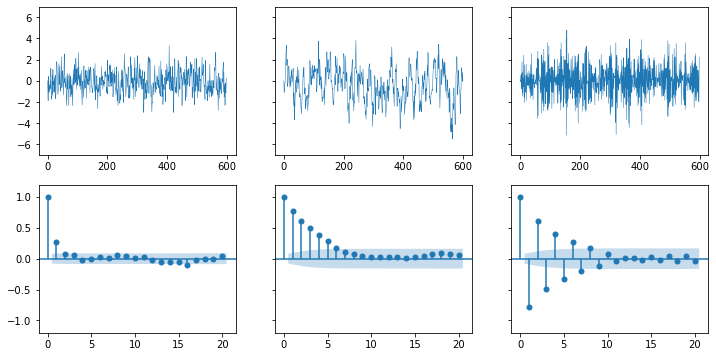

In [3]:
# create simulated AR(1) dataset with function created above
# fix the parameters first
ar1 = [0.3]  
ar2 = [0.8]
ar3 = [-0.8]

# size of sample
n = 600

# arange for x axis of plots
x = np.arange(n)

# simulate paths with function defined above
sim_AR1 = ARMA_process(n = n, phi = ar1)
sim_AR2 = ARMA_process(n = n, phi = ar2)
sim_AR3 = ARMA_process(n = n, phi = ar3)

# plotting of processes and ACFs
fig, ax = plt.subplots(2, 3, sharey='row', figsize=(12,6))
plot_acf(sim_AR1, lags=20, ax=ax[1,0],alpha=.05,title='')
ax[0,0].plot(sim_AR1, linewidth=.5)
plot_acf(sim_AR2, lags=20, ax=ax[1,1],alpha=.05,title='')
ax[0,1].plot(sim_AR2, linewidth=.5)
plot_acf(sim_AR3, lags=20, ax=ax[1,2],alpha=.05,title='')
ax[0,2].plot(sim_AR3, linewidth=.5)

for i in range(3):
    ax[0,i].set_ylim(-7,7)
    ax[1,i].set_ylim(-1.2,1.2)
    
plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/AR.pdf')
plt.show()


The following code creates and plots a sample path for an MA(4) process with parameters
\begin{equation*}
\theta = \lbrace -0.8, 0.4, -0.5, 0.7 \rbrace.
\end{equation*}

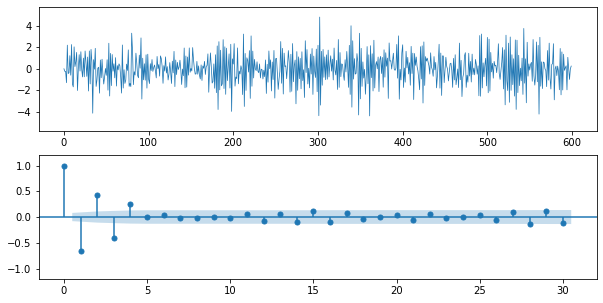

In [4]:
# parameters
ma = [-0.8, 0.4, -0.5, 0.7] # ma4 
n = 600

# simulation
sim_MA = ARMA_process(n = n, theta = ma)

# plot
fig, ax = plt.subplots(2, 1, sharey='row', figsize=(10,5))
plot_acf(sim_MA, lags=30, ax=ax[1],alpha=.05,title='')
ax[0].plot(sim_MA, linewidth=.75)

ax[0].set_ylim([-5.75, 5.75])
ax[1].set_ylim([-1.2, 1.2])

plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/MA.pdf')
plt.show()

The next example generates an ARMA(1,1) process with parameters 
\begin{equation*}
\Phi_1 = 0.4, \quad \theta_1 = 0.6.
\end{equation*}

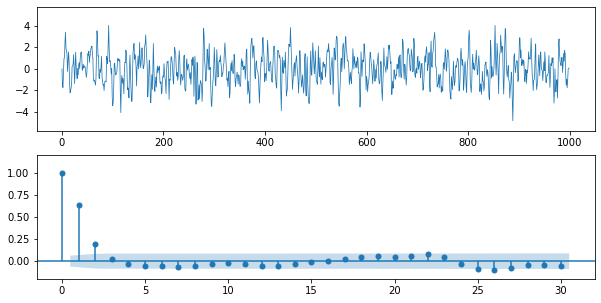

In [9]:
# parameters
ar = [0.4]
ma = [0.6]
n = 1000

# simulation
sim_ARMA = ARMA_process(n = n, phi = ar, theta = ma)

# plot
fig, ax = plt.subplots(2, 1, sharey='row', figsize=(10,5))
plot_acf(sim_ARMA, lags=30, ax=ax[1],alpha=.05,title='')
ax[0].plot(sim_ARMA, linewidth=.75)

ax[0].set_ylim([-5.75, 5.75])
ax[1].set_ylim([-0.2, 1.2])

plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/ARMA.pdf')
plt.show()